24
24


(0.0, 1.1)

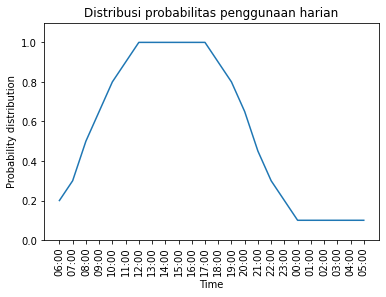

In [39]:
from model_lomba import *
import matplotlib.pyplot as plt
import seaborn as sns

demand = [0.2,0.3,0.5,0.65,0.8,0.9,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.8,0.65,0.45,0.3,0.2,0.1,0.1,0.1,0.1,0.1,0.1]
hour = ["06:00","07:00","08:00","09:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00","00:00","01:00","02:00","03:00","04:00","05:00"]
print(len(demand))
print(len(hour))

plt.plot(hour,demand)
plt.xticks(rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('Probability distribution')
plt.title('Distribusi probabilitas penggunaan harian')
plt.ylim([0.0,1.1])

In [40]:
map_width = 50
map_height = 50
moore = False
model = switching_model(num_of_motorist=50,num_of_stations=30,inv_size=10,cp_size= 10,width=map_width,height=map_height,moore=moore, configuration="less", demand = demand)

#Dalam menit
days = 14
num_of_step = days*24*60
#num_of_step = 100
for i in range(num_of_step):
    model.step()

5


In [41]:
#Ambil data agent
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data.head()

Position  Charge Alive  Full_battery  Empty_battery  CP_full  \
Step AgentID                                                                
0    0           None  2600.0  None           NaN            NaN      NaN   
     1           None  2600.0  None           NaN            NaN      NaN   
     2           None  2600.0  None           NaN            NaN      NaN   
     3           None  2600.0  None           NaN            NaN      NaN   
     4           None  2600.0  None           NaN            NaN      NaN   

              CP_empty  
Step AgentID            
0    0             NaN  
     1             NaN  
     2             NaN  
     3             NaN  
     4             NaN

In [42]:
motorist_alive = agent_data.xs(num_of_step-1,level = "Step")["Alive"]
motorist_id = []
for motor in model.motorists:
    motorist_id.append(motor.unique_id)
motorist_alive[motorist_id]

AgentID
150     True
151     True
152     True
153     True
154    False
155     True
156     True
157    False
158     True
159    False
160     True
161    False
162    False
163    False
164    False
165    False
166     True
167     True
168    False
169     True
170    False
171     True
172     True
173     True
174     True
175     True
176     True
177     True
178     True
179     True
180     True
181     True
182     True
183     True
184     True
185    False
186    False
187    False
188     True
189    False
190     True
191     True
192     True
193    False
194     True
195    False
196    False
197     True
198     True
199    False
Name: Alive, dtype: object

In [43]:

agent_pos = agent_data.xs(0,level = "Step")["Position"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_pos = agent_pos[station_id]
print(station_pos)

AgentID
200      (0, 0)
201     (49, 0)
202     (0, 49)
203    (49, 49)
204    (24, 24)
Name: Position, dtype: object


In [44]:
step_station = num_of_step-1
#step_station = 0
agent_full = agent_data.xs(step_station,level = "Step")["Full_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_full = agent_full[station_id]
print(station_full)

AgentID
200    10.0
201    10.0
202    10.0
203    10.0
204    10.0
Name: Full_battery, dtype: float64


In [45]:
agent_empty = agent_data.xs(step_station,level = "Step")["Empty_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_empty = agent_empty[station_id]
print(station_empty)

AgentID
200    0.0
201    0.0
202    0.0
203    0.0
204    0.0
Name: Empty_battery, dtype: float64


In [46]:
agent_cp_full = agent_data.xs(step_station,level = "Step")["CP_full"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_full = agent_cp_full[station_id]
print(station_cp_full)

AgentID
200    10.0
201    10.0
202    10.0
203    10.0
204    10.0
Name: CP_full, dtype: float64


In [47]:
agent_cp_empty = agent_data.xs(step_station,level = "Step")["CP_empty"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_empty = agent_cp_empty[station_id]
print(station_cp_empty)

AgentID
200    0.0
201    0.0
202    0.0
203    0.0
204    0.0
Name: CP_empty, dtype: float64


In [48]:
#Ambil data motorist
driver_num = 1
motorist_pos = agent_data.xs(model.motorists[driver_num].unique_id, level = "AgentID")["Position"]
motorist_pos.head()
motorist_pos.tail()

Step
20155    (23, 47)
20156    (23, 47)
20157    (23, 47)
20158    (23, 47)
20159    (23, 47)
Name: Position, dtype: object

Text(0, 0.5, 'y')

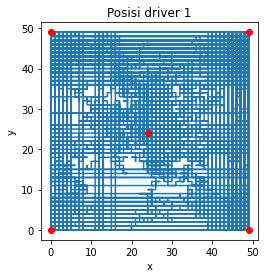

In [49]:
#Coba plot posisi
x_coor = []
y_coor = []
for coor in motorist_pos:
    x_coor.append(coor[0])
    y_coor.append(coor[1])



plt.plot(x_coor,y_coor)
for i in range(model.num_of_stations):
    plt.plot(model.stations[i].pos[0],model.stations[i].pos[1],color = "red", marker = 'o')
plt.xlim([0,map_width])
plt.ylim([0,map_height])
plt.title('Posisi driver ' + str(driver_num))
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')

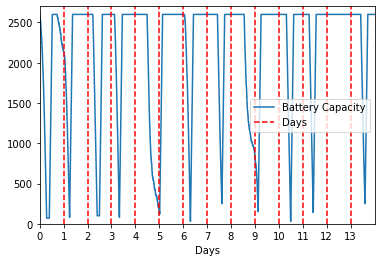

In [50]:
#Cek baterai
battery_id = 5
battery_energy = agent_data.xs(battery_id, level = "AgentID")["Charge"]
battery_energy.plot()
plt.xlim(0,num_of_step)
plt.ylim(0,2700)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Battery Capacity','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Example of Battery Charge Cycle')
plt.show()

In [51]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data.tail()

,num_of_alive
20155,32
20156,32
20157,32
20158,32
20159,32


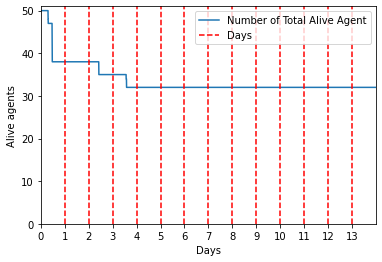

In [52]:
plt.plot(model_data)
plt.ylim([0,51])
plt.ylabel("Alive agents")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Number of Total Alive Agent','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
plt.show()

In [54]:
print(agent_data.columns.tolist())

['Position', 'Charge', 'Alive', 'Full_battery', 'Empty_battery', 'CP_full', 'CP_empty']


In [55]:
#dapetin semua motor
motorist_id = []
for mot in model.motorists:
    motorist_id.append(mot.unique_id)

#ID motor pertama dan terakhir
first_motor = min(motorist_id)
last_motor = max(motorist_id)

#Ambil data motor doang
motorist_data = agent_data.loc[(agent_data.index.get_level_values('AgentID')>=first_motor) & (agent_data.index.get_level_values('AgentID') <=last_motor)]


motorist_alive_position = motorist_data.loc[motorist_data['Alive'] == True]["Position"]
motorist_alive_position.tail()

#print jumlah baris
print(len(motorist_alive_position.index))

678352


In [56]:
array_alive_positions = motorist_alive_position.tolist()
print(len(array_alive_positions))

678352


Text(33.0, 0.5, 'y')

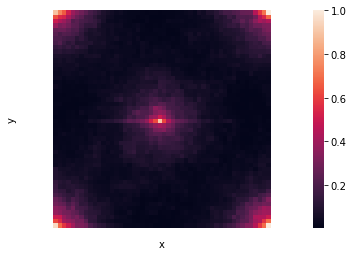

In [57]:
heatmap_data = np.zeros((model.grid.width, model.grid.height))
for coor in array_alive_positions:
    x,y = coor
    heatmap_data[x,y] +=1

most_frequent = np.amax(heatmap_data)
norm_heatmap_data = heatmap_data/most_frequent

ax = sns.heatmap(norm_heatmap_data)
ax.invert_yaxis()
plt.axis('equal')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.tick_params(left = False, bottom = False)
ax.set_xlabel('x')
ax.set_ylabel('y')



    